# PROJETO 3 - Ciência dos Dados 2019.2

## TEMA: Reincidência de Presos

Alunos: **Beatriz Cabral | Bruno Meneghesso | Jonas Lopes | William Silva** - *INSPER - INSTITUTO DE ENSINO E PESQUISA*

### OBJETIVO E PERGUNTA

O objetivo desse projeto é analisar qual a probabilidade de um prisioneiro reincidir, analisando as diferentes variáveis que afetam, tais como etnia, idade, tipo de crime entre outros. 

Ou seja, a pergunta poder ser definida por:

    "Dadas características, como etnia, idade e tipo de crime de uma determinada pessoa, qual é a probabilidade dele voltar à detenção?"

### CONTEXTUALIZAÇÃO

Diversos presos, em muitos locais de detenção, ficam um determinado tempo como detentos e, após saírem de tal situação, voltam a cometer crimes e voltam para 

### INFORMAÇÕES SOBRE O *DATASET*

O *dataset* a ser analisado é um grande conjunto de dados que tem informações sobre detentos, que estão descritas um pouco mais abaixo com maior detalhamento acerca de cada uma das variáveis. O propósito de analisar tais dados é de obter uma resposta à pergunta anterior

Este *dataset* foi criado com o objetivo de

Os dados para esta análise foram obtidos a partir deste [link](https://www.kaggle.com/slonnadube/recidivism-for-offenders-released-from-prison), por meio do site Kaggle. O Dataset utilizado conta com registro de 26021 pessoas. 


### Explicação cada uma das variáveis

* **Fiscal Year Released**: Ano fiscal (termina em 30 de junho nos EUA) para o qual o infrator foi libertado da prisão

* **Recidivism Reporting Year**: Ano fiscal (ano que termina em 30 de junho nos EUA) que marca o final do período de rastreamento de três anos. Por exemplo, os infratores que saíram da prisão no ano fiscal de 2012 são encontrados no relatório de reincidência do ano fiscal de 2015.

* **Race - Ethnicity**: representa a etnia dos detentos e é dividido em 4 grandes grupos: Americanos indianos, Asiáticos, Brancos e Negros.   

* **Age At Release**: Idade do prisioneiro no ano da sua soltura

* **Convicting Offense Classification**: Classificação da gravidade do crime. Penalidades máximas:

    A Felony = vida;

    B Felony = 25 ou 50 anos;

    C Felony = 10 anos; 

    D Felony = 5 anos; 

    Contravenção Agravada = 2 anos; 

    Contravenção Grave = 1 ano; 

    Contravenção Simples = 30 dias

* **Convicting Offense Type**: Categoria geral da ofensa mais grave pela qual o infrator foi colocado na prisão

* **Convicting Offense Subtype**: Subtipo de crime. Classificação adicional do crime mais grave pelo qual o agressor foi colocado na prisão.

* **Main Supervising District**: Distrito Judiciário responsável pela supervisão do infrator por mais tempo durante o período de rastreamento

* **Release Type**: Motivo para a libertação do infrator da prisão.

* **Part of Target Population**: Parte da população-alvo. O Departamento de Correções adotou estratégias específicas para reduzir as taxas de reincidência de prisioneiros em liberdade condicional e que fazem parte da população-alvo.

* **Recidivism - Return to Prison numeric**:

    0 = Não há reincidência;
    
    1 = Entrada na prisão por qualquer motivo dentro do período de rastreamento de três anos


## Hipótese e Mecanismo

A partir disso, pode-se partir para a análise, visando saber se 

Para iniciar, pressupõe que, um detento, ao 

Com isso, é possível separar a análise em partes para refutar posteriormente à pergunta inicial:

        1. blablba
        2. blabla
        3. blablabla
        4. blablabla
        
(No mecanismo, escrever que faremos random forest e explicar o que é)

# Análise

### Importando biblioteca e leitura dos arquivos

In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [3]:
db = pd.read_csv('3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa_elaborated.csv')

#db['Recidivism - Return to Prison numeric'].value_counts().to_frame()

Abaixo, temos uma simples vizualização dos dados, para que seja possível analisar as colunas e o que se possui como conteúdo nela.

In [4]:
db.head()

,Fiscal Year Released,Recidivism Reporting Year,Race - Ethnicity,Age At Release,Convicting Offense Classification,Convicting Offense Type,Convicting Offense Subtype,Main Supervising District,Release Type,Release type: Paroled to Detainder united,Part of Target Population,Recidivism - Return to Prison numeric
0,2010,2013,White - Non-Hispanic,Under 25,D Felony,Violent,Assault,4JD,Parole,Parole,Yes,1
1,2010,2013,White - Non-Hispanic,55 and Older,D Felony,Public Order,OWI,7JD,Parole,Parole,Yes,1
2,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Burglary,5JD,Parole,Parole,Yes,1
3,2010,2013,White - Non-Hispanic,55 and Older,C Felony,Drug,Trafficking,8JD,Parole,Parole,Yes,1
4,2010,2013,Black - Non-Hispanic,25-34,D Felony,Drug,Trafficking,3JD,Parole,Parole,Yes,1


A partir da tabela acima, pode-se observar que nesta prisão 17339 presos não voltam a cometer crimes e 8681 reincidem.

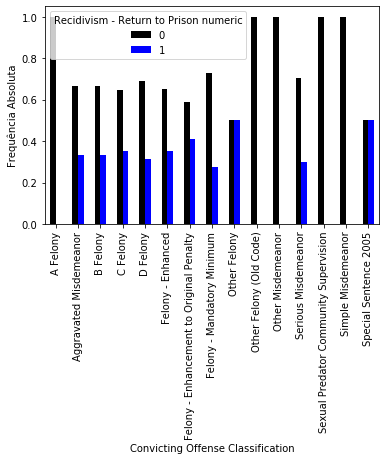

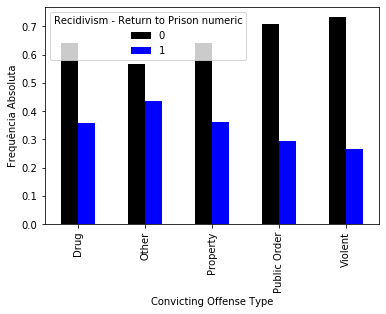

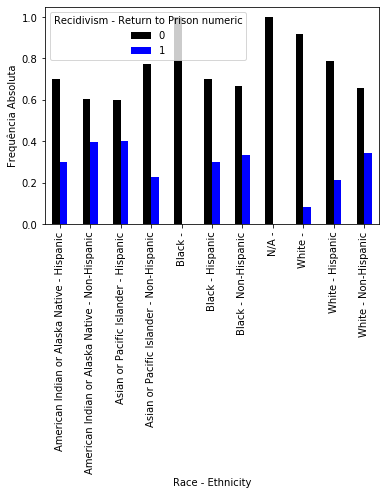

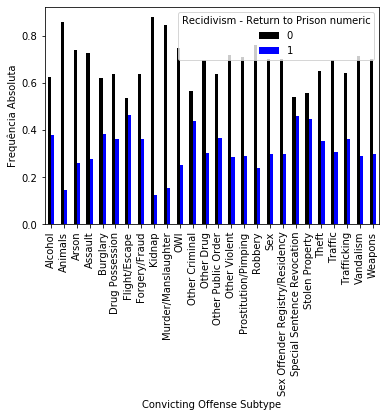

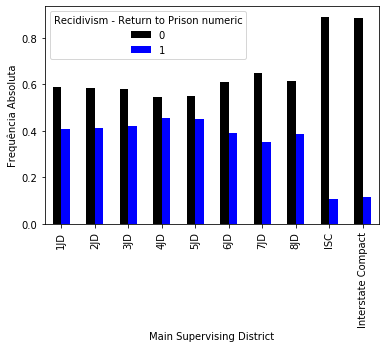

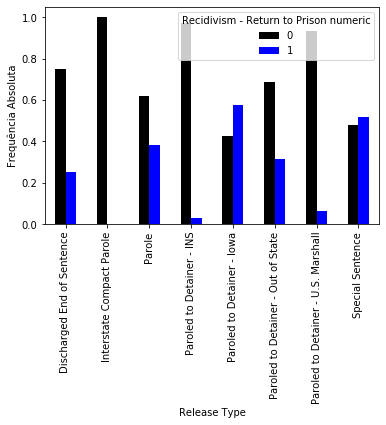

In [10]:
def exploratoria (data,compara, cat=[]):
    d0=data[data[compara]==0]
    d1=data[data[compara]==1]
    cros={}
    cros_norm={}
    box={}
    for c in cat:
        #print(pd.crosstab(data[c],data[compara],normalize='index'))
        
        #print(pd.crosstab(data[c],data[compara]))
        #cros[c] = pd.crosstab(data[c],data[compara])
        cros_norm[c] = pd.crosstab(data[c],data[compara],normalize='index')
        cros_norm[c].plot(kind='bar', color=('black', 'b'))
        plt.ylabel('Frequência Absoluta')
        plt.show()
exploratoria(db,'Recidivism - Return to Prison numeric',cat = ['Convicting Offense Classification', 'Convicting Offense Type',
                                                               'Race - Ethnicity', 'Convicting Offense Subtype',
                                                               'Main Supervising District','Release Type'])

analize

In [8]:
encoder = OneHotEncoder()
def one_hot_enc(data,num=[],cat=[]):
    d=data[cat]
    print (d.shape)
    for c in cat:
        n=0
        while n < len(d[c]):
            if d[c][n] not in d[c].values:
                d[c][n]='not'
            n+=1
    dnum=data[num]
    print (dnum.shape)
    encoded=encoder.fit_transform(d)
    array=encoded.toarray()
    numarray=dnum.values
    return np.concatenate((numarray, array), axis=1)

var_enc = one_hot_enc(db,num=['Fiscal Year Released'],cat=['Main Supervising District','Race - Ethnicity',
                                                           'Convicting Offense Classification','Convicting Offense Type',
                                                           'Convicting Offense Subtype','Release Type','Part of Target Population'])

X_train, X_test, y_train, y_test = train_test_split(var_enc, db['Recidivism - Return to Prison numeric'])

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('random forest: {}'.format(accuracy_score(y_test, y_pred)))

model2=DecisionTreeClassifier()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

print('decision tree: {}'.format(accuracy_score(y_test, y_pred2)))

model3=MultinomialNB()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

print('multinomial NB: {}'.format(accuracy_score(y_test, y_pred3)))

(26020, 7)


C:\Users\bruno\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(26020, 1)


C:\Users\bruno\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


random forest: 0.6415065334358186
decision tree: 0.6421214450422752
multinomial NB: 0.6341275941583397


analize

## CONCLUSÃO

### Propostas de Aperfeiçoamento do Projeto

## REFERÊNCIAS

**[1]** IPEA. Reincidência criminal no Brasil. Disponível em: https://www.cnj.jus.br/wp-content/uploads/2011/02/716becd8421643340f61dfa8677e1538.pdf. Acesso em 15 nov. 2019.

**[1]** BLABLBALBALBABA

**[1]** BLABLBALBALBABA

**[1]** BLABLBALBALBABA